In [2]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [6]:
def generate_2d_pink_noise(size=(70,70), frequency=1.0, seed=0):
    
    '''
    This function generates a 2d array of pink noise.
    Notice that useful plots are added in the comments.
    Note: helper plots depend on "import matplotlib.pyplot as plt"
    
    The first grouping of code calculates features from randomness.
    The second grouping initalizes an inverse frequency gradient (pink noise).
    The third grouping mixes randomness and inverse gradient to "activate" certain areas. 
    '''
    
    #ERROR! REPRODUCE WITH: size=(200,100)
    
    np.random.seed(seed)
    #allows for reproducable results
    rand_array = np.random.rand(size[0],size[1])
    plt.imshow(rand_array);plt.title("rand_array");plt.show()
    #Generates a random 2d array.
    rand_fft = np.fft.fft2(rand_array)
    #Calculates 2-dimensional discrete Fourier Transform.
    rand_shifted = np.fft.fftshift(rand_fft)
    #Shift the zero-frequency component to the center of the spectrum.
    rand_phase = np.angle(rand_shifted)
    print(rand_array.shape)

    #Calculates the angle in radians from the complex argument rand_shifted.
    half_cast = (int(size[0]/2.0), int(size[1]/2.0))
    #Divides the x and y size values by two and casts them to ints.
    [x_gradient, y_gradient] = np.meshgrid(range(-half_cast[0], half_cast[0]), range(-half_cast[1], half_cast[1]))
    #THIS IS WHERE ERROR OCCURS 200,100 BECOMES 100,200
    #plt.imshow(x_gradient);plt.title("x_gradient");plt.show();plt.imshow(y_gradient);plt.title("y_gradient");plt.show()
    #Creates 2d gradient for x and y.
    print(x_gradient.shape)
    radial_gradient = np.sqrt(x_gradient**2 + y_gradient**2)
    #plt.imshow(radial_gradient);plt.title("radial_gradient");plt.show()
    #Generates a radial gradient from x_gradient and y_gradient -- think pythagorean theorem
    radial_gradient[np.where(radial_gradient == 0)] = 1
    #To avoid divison by zero (center of radial gradient) all zero values are set to 1 (closest int value)
    frequency_gradient = radial_gradient ** frequency
    #Creates a frequency gradient.
    inverse_gradient = 1.0 / frequency_gradient
    #Inverts gradient.
    
    noise = inverse_gradient * np.exp(1j*rand_phase)
    #This filters the randomness generated above for pink noise (keep in mind that noise values are complex).
    noise_shifted = np.fft.fftshift(noise)
    #Shifts the zero-frequency component to the center of the spectrum (less of a hot spot in the center).
    noise_fft = np.fft.ifft2(noise_shifted)
    #2d fft on the noise.
    pink_noise = np.real(noise_fft)
    #convert the noise from complex to real space
    norm_pink_noise = (pink_noise - np.mean(pink_noise)) / np.std(pink_noise)
    #normalize pink noise
    
    #plt.imshow(norm_pink_noise);plt.title("norm_pink_noise");plt.show()
    return norm_pink_noise

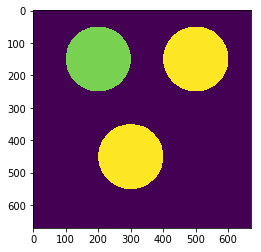

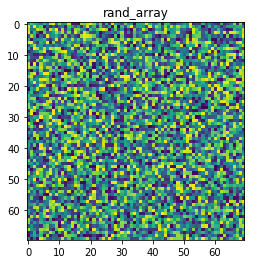

(70, 70)
(70, 70)


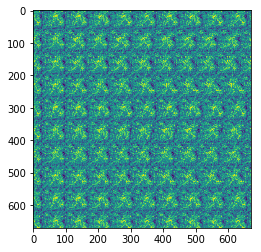

0


In [8]:
def create_circular_depthmap(shape=(670, 670), center=None, radius=100):

    depthmap = np.zeros(shape, dtype=np.float)
    a, b = 150, 200
    n = 670
    r = 100
    y,x = np.ogrid[-a:n-a, -b:n-b]
    mask = x*x + y*y <= r*r
    depthmap[mask] = 4
    a, b = 150, 500
    n = 670
    r = 100
    y,x = np.ogrid[-a:n-a, -b:n-b]
    mask = x*x + y*y <= r*r
    depthmap[mask] = 5
    a, b = 450, 300
    n = 670
    r = 100
    y,x = np.ogrid[-a:n-a, -b:n-b]
    mask = x*x + y*y <= r*r
    depthmap[mask] = 5
    #depthmap[200:500,200:500] = 5
    return depthmap 




def make_autostereogram(depthmap, pattern):
    "Creates an autostereogram from depthmap and pattern."

    autostereogram = np.zeros_like(depthmap, dtype=pattern.dtype)
    for r in np.arange(autostereogram.shape[0]):
        for c in np.arange(autostereogram.shape[1]):
            if c < pattern.shape[1]:
                autostereogram[r, c] = pattern[r % pattern.shape[0], c]
            else:
                shift = int(depthmap[r, c])
                autostereogram[r, c] = autostereogram[r, c - pattern.shape[1] + shift]
    return autostereogram




depthmap = create_circular_depthmap(radius=150)
plt.imshow(depthmap)
plt.show()
pink_noise = generate_2d_pink_noise()
autostereogram = make_autostereogram(depthmap, pink_noise)
plt.imshow(autostereogram)
plt.show()



rescaled = (255.0 / autostereogram.max() * (autostereogram - autostereogram.min())).astype(np.uint8)
sv = PIL.Image.fromarray(rescaled)
sv.save("shift5_70patch.png")

rescaled = (depthmap).astype(np.uint8)

#rescaled = (255.0 / depthmap.max() * (depthmap - depthmap.min())).astype(np.uint8)
sv = PIL.Image.fromarray(rescaled)
sv.save("dm.png")

inv = np.invert(rescaled, dtype=np.uint8)
sv = PIL.Image.fromarray(inv)
sv.save("inverted_dm.png")

print(rescaled[100,100])




